In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

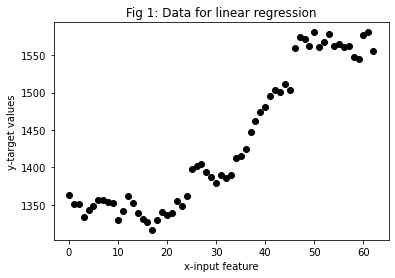

In [18]:
#data preparation
df = pd.read_csv("INFY.NS.csv")
df = df.reset_index()
x = np.array(df.index).reshape(-1, 1)
y = df['Close']
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()


In [28]:
#Split the dataset into training, validation and test sets
n = len(x)

random_indices = np.random.permutation(n)
#Training set
x_train = x[random_indices[:48]]
y_train = y[random_indices[:48]]
#Validation set
x_val = x[random_indices[48:55]]
y_val = y[random_indices[48:55]]
#Test set
x_test = x[random_indices[55:]]
y_test = y[random_indices[55:]]


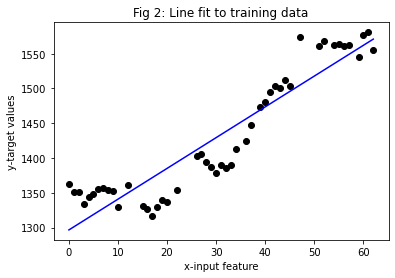

In [29]:
learner = LinearRegression() #initializing linear regression model
learner.fit(x_train,y_train) #training the linear regression model

plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),learner.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

In [32]:
mean_val_error = np.mean( (y_val - learner.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - learner.predict(x_test.reshape(len(x_test),1)))**2 )
score_test=learner.score(x_test,y_test)
score_val=learner.score(x_val,y_val)
print("Score_test is",score_test)
print("Score_val is",score_val)


print('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Score_test is 0.8290093037884412
Score_val is 0.8028247160959063
Validation MSE:  1835.713545713756 
Test MSE:  1485.1055336582667


In [ ]:
#2nd Method of stock price prediction

In [3]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [10]:
df = pd.read_csv("INFY.NS.csv")
forecast_col = 'close'
forecast_out = 5
test_size = 0.2

In [11]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size) #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

KeyError: 'close'

In [39]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': -140.5743833939089, 'forecast_set': array([1295.83305144, 1296.41772121, 1298.12071906, 1295.07572751,
       1296.00047365])}
